In [ ]:
"""
- 사용 이미지 데이터 셋 : 숫자 이미지 (케라스에서 제공하는 mnist)
- mnist 이미지를 이용하여, 어떤 이미지들이 있는지 확인
- CNN 이용하여 손실 및 정확도 향상시키기
- 최종 결과는 테스트 데이터로 예측 후 상위 10개에 대한 예측값과 실제값 비교값 출력
- 조원들과 비교하여 우수한 모델 만들어 주세요..

- 제출 파일명 : 02_합성곱신경망(CNN)_이미지분류(실습)_홍길동_손실율.ipynb
"""

In [1]:
### 텐서플로우 프레임워크(패키지)
import tensorflow as tf

### 케라스 라이브러리
from tensorflow import keras
from keras.layers import Input, Dense, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

### 시각화 라이브러리
import matplotlib.pyplot as plt

### 넘파이
import numpy as np

### 데이터 분류
from sklearn.model_selection import train_test_split

### 딥럽닝 랜던 규칙
tf.keras.utils.set_random_seed(42)

In [2]:
### 데이터 불러들이기
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
### 4차원으로 변경 및 데이터를 0~1사이의 값으로 스케일링 처리하기
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

print(train_scaled.shape, train_target.shape)
print(test_scaled.shape, test_target.shape)
print(train_scaled[5][5])

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05098039]
 [0.09803922]
 [0.39215686]
 [0.47843137]
 [0.02745098]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


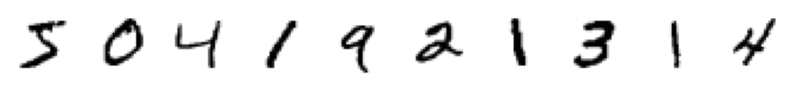

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap="gray_r")
    axs[i].axis("off")

plt.show()


In [5]:
### 데이터 분류 8:2
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


In [7]:
model = Sequential([
    Conv2D(
        kernel_size=3,
        filters=64,
        strides=1,
        padding="same",
        activation="relu",
        input_shape = (28, 28, 1)
    ),
    MaxPool2D(
        pool_size=2,
        strides=2
    ),
    Conv2D(
        kernel_size=3,
        filters=32,
        strides=1,
        padding="same",
        activation="relu",
    ),
    MaxPool2D(
        pool_size=2,
        strides=2
    ),
    keras.layers.Flatten(),
    Dense(
        units=64,
        activation="relu"
    ),
    Dense(
        units=32,
        activation="relu"
    ),
    Dense(
        units=10,
        activation="softmax"
    )
])

In [14]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [22]:
mc = ModelCheckpoint(
    "./model/best_cnn_mnist_model.h5",
    save_best_only=True
)

es = EarlyStopping(
    patience=5,
    restore_best_weights=True
)

In [23]:
history = model.fit(
    train_scaled,
    train_target,
    validation_data=(val_scaled,
                     val_target),
    epochs=1000,
    callbacks=[mc, es]
)

Epoch 1/1000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.0565 - val_accuracy: 0.9900
Epoch 2/1000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0678 - val_accuracy: 0.9875
Epoch 3/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0590 - val_accuracy: 0.9883
Epoch 4/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0549 - val_accuracy: 0.9903
Epoch 5/1000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9978 - val_loss: 0.0500 - val_accuracy: 0.9917
Epoch 6/1000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0543 - val_accuracy: 0.9896
Epoch 7/1000
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0658 -

In [24]:
### 최종 성능 검증 결과 확인하기
# 훈련데이터를 이용한 손실 및 정확도 확인하기
train_score = model.evaluate(train_scaled, train_target)
print(f"훈련 데이터 - 손실율 : {train_score[0]}, 정확도 : {train_score[1]}")

# 검증데이터를 이용한 손실 및 정확도 확인하기
val_score = model.evaluate(val_scaled, val_target)
print(f"검증 데이터 - 손실율 : {val_score[0]}, 정확도 : {val_score[1]}")

1500/1500 [==============================] - 3s 2ms/step - loss: 9.5386e-04 - accuracy: 0.9996
훈련 데이터 - 손실율 : 0.0009538560989312828, 정확도 : 0.999625027179718
375/375 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9917
검증 데이터 - 손실율 : 0.04996316507458687, 정확도 : 0.9916666746139526


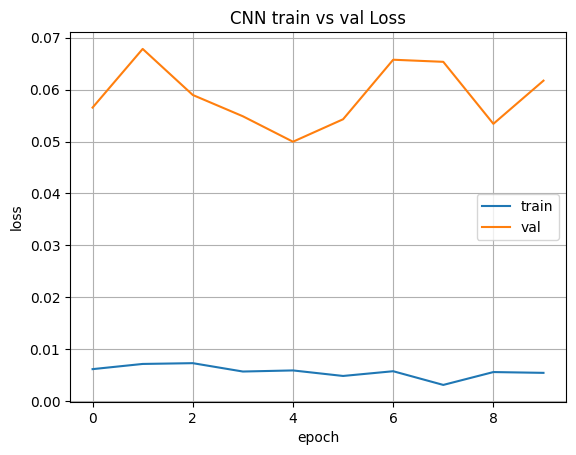

In [52]:
plt.title("CNN train vs val Loss")
plt.plot(history.epoch, history.history["loss"])
plt.plot(history.epoch, history.history["val_loss"])

plt.xlabel("epoch")
plt.ylabel("loss")

plt.legend(["train", "val"])
plt.grid()
plt.show()

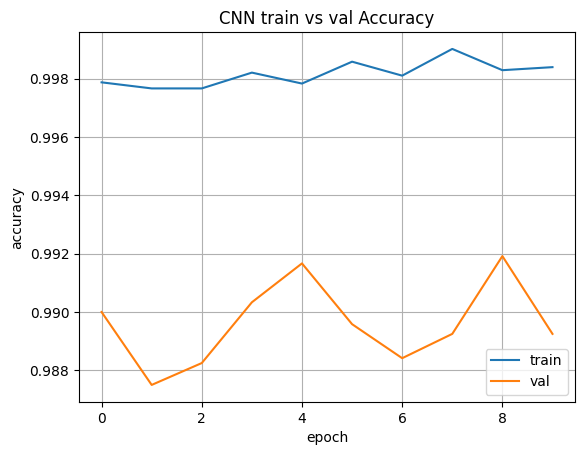

In [57]:
plt.title("CNN train vs val Accuracy")
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["val_accuracy"])

plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend(["train", "val"])
plt.grid()
plt.show()

In [41]:
test_pred = model.predict(test_scaled)
print(test_pred.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [42]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

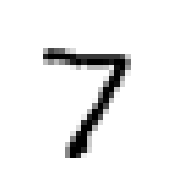

예측값 : 7
실제값 : 7


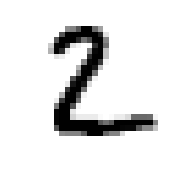

예측값 : 2
실제값 : 2


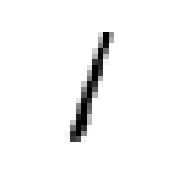

예측값 : 1
실제값 : 1


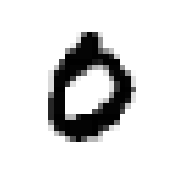

예측값 : 0
실제값 : 0


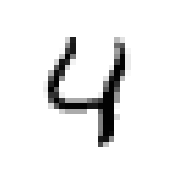

예측값 : 4
실제값 : 4


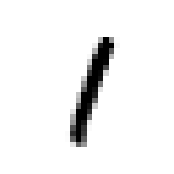

예측값 : 1
실제값 : 1


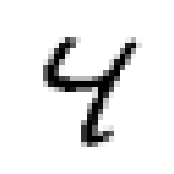

예측값 : 4
실제값 : 4


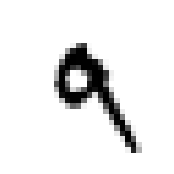

예측값 : 9
실제값 : 9


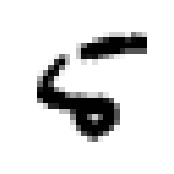

예측값 : 5
실제값 : 5


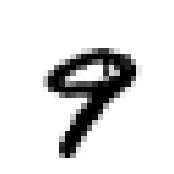

예측값 : 9
실제값 : 9


In [44]:
for i in range(10):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_scaled[i].reshape(28, 28), cmap="gray_r")
    plt.axis("off")
    plt.show()

    pred_idx = np.argmax(test_pred[i])
    print(f"예측값 : {classes[pred_idx]}")
    print(f"실제값 : {classes[test_target[i]]}")
    